## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-01 10:54:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.2’

CreditScoring.csv.2 100%[===================>] 178,21K  --.-KB/s    in 0,06s   

2021-10-01 10:54:27 (2,78 MB/s) - ‘CreditScoring.csv.2’ saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


Some of the features are encoded as numbers. Use the following code to de-code them:

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


Prepare the numerical variables:

In [5]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [6]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [7]:
df['default'] = (df.status == 'default').astype(int)
del df['status']
df

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020,1
4450,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263,0
4451,0,owner,24,37,married,no,partime,60,90,3500,0,500,963,1
4452,0,rent,48,23,single,no,freelance,49,140,0,0,550,550,0


## Your code

What are the categorical variables? What are the numerical?

In [8]:
numerical = ["seniority","time","age","expenses","income","assets","debt","amount","price","default"]
categorical = ["home", "marital", "records", "job"]

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [9]:
# Setup validation framework
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop="true")
df_val = df_val.reset_index(drop="true")
df_test = df_test.reset_index(drop="true")

# y_full_train = df_full_train.churn.values
# y_train = df_train.churn.values
# y_val = df_val.churn.values
# y_test = df_test.churn.values

# del df_test["churn"]
# del df_val["churn"]
# del df_train["churn"]
# df_train.columns

print("train: %.2f, val: %.2f, test: %.2f" % (len(df_train)/len(df), len(df_val)/len(df), len(df_test)/len(df)))

train: 0.60, val: 0.20, test: 0.20


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [140]:
# Q1

import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

def train(dataFrame, y):
    dicts = dataFrame.to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    model = linear_model.LogisticRegression()
    model.fit(X, y)
    return dv, model

def predict(dataFrame, dv, model):
    dicts = dataFrame.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

fields = [
    {"field": "seniority", "correlation": 1},
    {"field": "time", "correlation": 1},
    {"field": "age", "correlation": 1},
    {"field": "expenses", "correlation": 1},
    {"field": "income", "correlation": 1},
    {"field": "assets", "correlation": 1},
    {"field": "debt", "correlation": 1},
    {"field": "amount", "correlation": 1},
    {"field": "price", "correlation": -1},
    {"field": "default", "correlation": 1}
]

for f in fields:
    df_train_selected = df_train[[f["field"]]]
    df_val_selected = df_val[[f["field"]]]

    y_train = f["correlation"] * df_train["default"].values
    y_val = df_val["default"].values

    dv, model = train(df_train_selected, y_train)
    y_pred = predict(df_val_selected, dv, model)

#     display(y_val, y_pred)
    auc = metrics.roc_auc_score(y_val, y_pred)
    print("field:", f["field"], "auc:",round(auc,3))

field: seniority auc: 0.69
field: time auc: 0.553
field: age auc: 0.559
field: expenses auc: 0.513
field: income auc: 0.664
field: assets auc: 0.602
field: debt auc: 0.508
field: amount auc: 0.588
field: price auc: 0.534
field: default auc: 1.0


In [139]:
# Q1b (no model training)

import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

fields = [
    {"field": "seniority", "correlation": -1},
    {"field": "time", "correlation": 1},
    {"field": "age", "correlation": -1},
    {"field": "expenses", "correlation": -1},
    {"field": "income", "correlation": -1},
    {"field": "assets", "correlation": -1},
    {"field": "debt", "correlation": -1},
    {"field": "amount", "correlation": 1},
    {"field": "price", "correlation": 1},
    {"field": "default", "correlation": 1}
]

# df_train[fields[0]["field"]].values


# metrics.roc_auc_score([1,0,1], [0.3, 0.2, 0.4])

for f in fields:
    train_selected = f["correlation"] * df_train[f["field"]].values
#     df_val_selected = df_val[[f["field"]]]

#     y_train = f["correlation"] * df_train["default"].values
    y = df_train["default"].values

#     dv, model = train(df_train_selected, y_train)
#     y_pred = predict(df_val_selected, dv, model)

    auc = metrics.roc_auc_score(y, train_selected)
    print("field:", f["field"], "auc:",round(auc,3))

field: seniority auc: 0.709
field: time auc: 0.561
field: age auc: 0.573
field: expenses auc: 0.501
field: income auc: 0.682
field: assets auc: 0.649
field: debt auc: 0.505
field: amount auc: 0.591
field: price auc: 0.504
field: default auc: 1.0


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [37]:
# Q2
selected_fields = ['seniority', 'income', 'assets', 'records', 'job', 'home']

def train(dataFrame, y):
    dicts = dataFrame[selected_fields].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    model = linear_model.LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return dv, model

def predict(dataFrame, dv, model):
    dicts = dataFrame.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

y_train = df_train["default"].values
y_val = df_val["default"].values

dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)

auc = metrics.roc_auc_score(y_val, y_pred)
print("auc:",round(auc,3))


auc: 0.812


## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

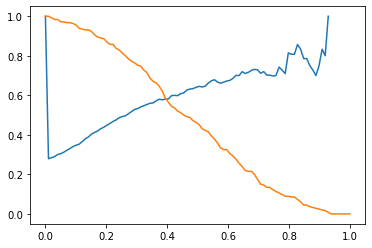

In [60]:
import matplotlib.pyplot as plt

precissions = []
recalls = []

# default prediction thrashold:
thrashholds = np.linspace(0,1, 100)

for t in thrashholds:
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    actual_positive = (y_val >= t)
    actual_negative = (y_val < t)

    true_positive = (predict_positive & actual_positive).sum()
    true_negative = (predict_negative & actual_negative).sum()
    false_positive = (predict_positive & actual_negative).sum()
    false_negative = (predict_negative & actual_positive).sum()

    precission = true_positive / (true_positive + false_positive)
#     print("t=",t, "precission=",precission)
    precissions.append(precission)

    recall = true_positive / (true_positive + false_negative)
#     print("t=",t, "recall=",recall)
    recalls.append(recall)

# precissions, recalls

plt.plot(thrashholds, precissions)
plt.plot(thrashholds, recalls)

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [99]:
thrashholds_precissions_recalls = zip(thrashholds, precissions, recalls)
# set(thrashholds_precissions_recalls)

thrashholds_F1s = []

for t_p_r in thrashholds_precissions_recalls:
    F1 = (2*t_p_r[1]*t_p_r[2])/(t_p_r[1]+t_p_r[2])
    thrashholds_F1s.append((t_p_r[0], F1))

sorted_thrashholds_F1s = sorted(thrashholds_F1s, key=lambda elem: elem[1], reverse=True)
rounded_sorted_thrashholds_F1s = map(lambda t: (round(t[0],2),round(t[1],2)), sorted_thrashholds_F1s)
list(rounded_sorted_thrashholds_F1s)

#threashold #F1



[(0.0, 1.0),
 (0.31, 0.63),
 (0.32, 0.62),
 (0.29, 0.62),
 (0.33, 0.62),
 (0.3, 0.62),
 (0.28, 0.62),
 (0.34, 0.62),
 (0.27, 0.62),
 (0.36, 0.61),
 (0.24, 0.61),
 (0.25, 0.61),
 (0.26, 0.61),
 (0.37, 0.61),
 (0.35, 0.61),
 (0.23, 0.61),
 (0.22, 0.61),
 (0.38, 0.6),
 (0.21, 0.6),
 (0.2, 0.59),
 (0.19, 0.59),
 (0.39, 0.58),
 (0.18, 0.58),
 (0.4, 0.57),
 (0.17, 0.57),
 (0.41, 0.57),
 (0.16, 0.57),
 (0.42, 0.57),
 (0.15, 0.56),
 (0.43, 0.56),
 (0.44, 0.56),
 (0.46, 0.55),
 (0.47, 0.55),
 (0.45, 0.55),
 (0.14, 0.55),
 (0.48, 0.54),
 (0.13, 0.54),
 (0.49, 0.54),
 (0.51, 0.53),
 (0.12, 0.53),
 (0.52, 0.52),
 (0.11, 0.51),
 (0.53, 0.51),
 (0.54, 0.51),
 (0.1, 0.51),
 (0.09, 0.5),
 (0.55, 0.5),
 (0.08, 0.49),
 (0.56, 0.49),
 (0.07, 0.48),
 (0.06, 0.47),
 (0.57, 0.47),
 (0.05, 0.46),
 (0.04, 0.46),
 (0.03, 0.45),
 (0.58, 0.44),
 (0.02, 0.44),
 (0.6, 0.44),
 (0.59, 0.44),
 (0.01, 0.44),
 (0.61, 0.42),
 (0.62, 0.41),
 (0.63, 0.4),
 (0.64, 0.38),
 (0.65, 0.36),
 (0.66, 0.34),
 (0.68, 0.33),
 (0.67,

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [109]:
# !pip install tqdm
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

#Cross Validation
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

def train(dataFrame, y):
    dicts = dataFrame[selected_fields].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    model = linear_model.LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return dv, model

def predict(dataFrame, dv, model):
    dicts = dataFrame.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

# df_full_train_selected1 = df_full_train[selected_fields]

splits = 5

# for C in tqdm([ 0.001, 0.01, 0.1, 0.5, 1, 5, 10], total=splits):
kf = KFold(n_splits=splits, shuffle=True, random_state=1)
auc_scores = []
for train_idx, val_idx in kf.split(df_full_train):

    df_train_itter = df_full_train.iloc[train_idx]
    df_val_itter = df_full_train.iloc[val_idx]

    y_train_iter = df_full_train.iloc[train_idx].default.values
    y_val_iter = df_full_train.iloc[val_idx].default.values

    dv, model = train(df_train_itter, y_train_iter)
    y_pred_iter = predict(df_val_itter, dv, model)
    auc = metrics.roc_auc_score(y_val_iter, y_pred_iter)
    auc_scores.append(auc)

auc_scores
print("AUC mean: %.4f, AUC std: +-%.4f" % (np.mean(auc_scores), np.std(auc_scores)))

AUC mean: 0.8142, AUC std: +-0.0146


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [113]:
# !pip install tqdm
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

#Cross Validation
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

def train(dataFrame, y, C):
    dicts = dataFrame[selected_fields].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)

    model = linear_model.LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    return dv, model

def predict(dataFrame, dv, model):
    dicts = dataFrame.to_dict(orient="records")
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

# df_full_train_selected1 = df_full_train[selected_fields]

splits = 5

for C in tqdm([0.01, 0.1, 1, 10], total=4):
    kf = KFold(n_splits=splits, shuffle=True, random_state=1)
    auc_scores = []
    for train_idx, val_idx in kf.split(df_full_train):

        df_train_itter = df_full_train.iloc[train_idx]
        df_val_itter = df_full_train.iloc[val_idx]

        y_train_iter = df_full_train.iloc[train_idx].default.values
        y_val_iter = df_full_train.iloc[val_idx].default.values

        dv, model = train(df_train_itter, y_train_iter,C)
        y_pred_iter = predict(df_val_itter, dv, model)
        auc = metrics.roc_auc_score(y_val_iter, y_pred_iter)
        auc_scores.append(auc)

    print("C: %s, AUC mean: %.3f, AUC std: +-%.4f" % (C, np.mean(auc_scores), np.std(auc_scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C: 0.01, AUC mean: 0.809, AUC std: +-0.0126
C: 0.1, AUC mean: 0.813, AUC std: +-0.0137
C: 1, AUC mean: 0.814, AUC std: +-0.0146
C: 10, AUC mean: 0.812, AUC std: +-0.0142


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.